In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle

# Load the dataset
df = pd.read_csv('../artifacts/Student_performance_data.csv')
df.drop('StudentID', axis=1, inplace=True)
df.drop('GPA', axis=1, inplace=True)
#df.drop('GradeClass', axis=1, inplace=True)

# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GradeClass           0
dtype: int64


In [12]:
from sklearn.impute import SimpleImputer

# Define column groups
ordinal_cols = ['ParentalSupport', 'ParentalEducation']
nominal_cols = ['Gender', 'Ethnicity', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
num_cols = ['StudyTimeWeekly', 'Absences', 'Age']

# Filter only columns with missing values
ordinal_missing = [col for col in ordinal_cols if df[col].isnull().any()]
nominal_missing = [col for col in nominal_cols if df[col].isnull().any()]
num_missing = [col for col in num_cols if df[col].isnull().any()]

# Impute Numerical (mean)
if num_missing:
    imputer = SimpleImputer(strategy='mean')
    df[num_missing] = imputer.fit_transform(df[num_missing])
    print(f"Mean imputation applied to numerical columns: {num_missing}")
else:
    print("No missing values found in numerical columns.")

# Impute Ordinal (mean)
if ordinal_missing:
    mean_imputer = SimpleImputer(strategy='mean')
    df[ordinal_missing] = mean_imputer.fit_transform(df[ordinal_missing])
    print(f"Mean imputation applied to ordinal columns: {ordinal_missing}")
else:
    print("No missing values found in ordinal columns.")

# Impute Nominal (mode)
if nominal_missing:
    mode_imputer = SimpleImputer(strategy='most_frequent')
    df[nominal_missing] = mode_imputer.fit_transform(df[nominal_missing])
    print(f"Mode imputation applied to nominal columns: {nominal_missing}")
else:
    print("No missing values found in nominal columns.")




No missing values found in numerical columns.
No missing values found in ordinal columns.
No missing values found in nominal columns.


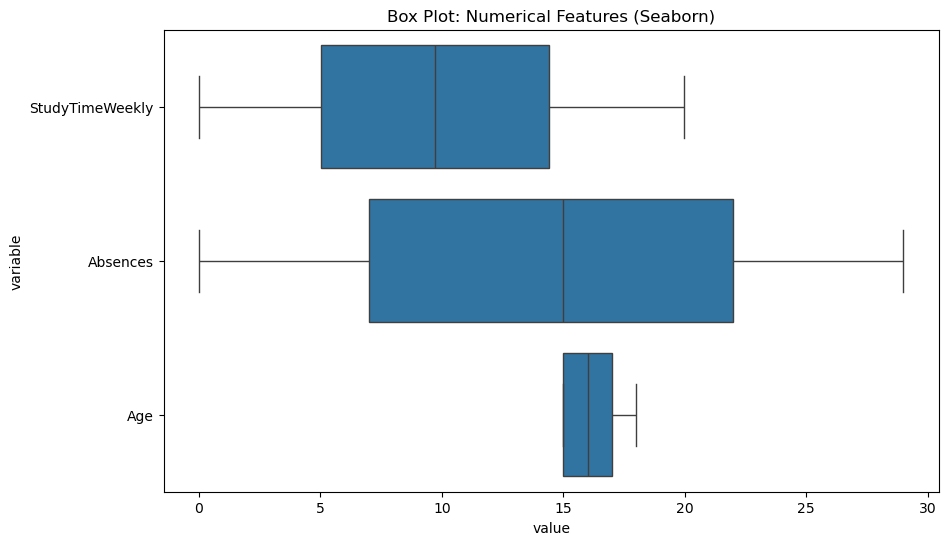

In [13]:
melted_df = df.melt(value_vars=num_cols)
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='value', y='variable', orient='h')
plt.title('Box Plot: Numerical Features (Seaborn)')
plt.show()


In [14]:
def remove_outliers_iqr(df, columns):
    original_shape = df.shape[0]  # Total rows before removal
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        before_count = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after_count = df.shape[0]
        removed = before_count - after_count

        if removed > 0:
            print(f"{removed} outlier(s) removed from '{col}'.")
        else:
            print(f"No outliers found in '{col}'.")
    
    final_count = df.shape[0]
    print(f"\nTotal rows removed: {original_shape - final_count}")
    print(f"Final dataset size: {df.shape[0]} rows\n")
    
    return df


df_clean = remove_outliers_iqr(df, num_cols)

with open("../artifacts/cleaned_data.csv", "w") as f:
    df_clean.to_csv(f, index=False)

No outliers found in 'StudyTimeWeekly'.
No outliers found in 'Absences'.
No outliers found in 'Age'.

Total rows removed: 0
Final dataset size: 2392 rows



In [15]:
df.describe

<bound method NDFrame.describe of       Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  Absences  \
0      17       1          0                  2        19.833723         7   
1      18       0          0                  1        15.408756         0   
2      15       0          2                  3         4.210570        26   
3      17       1          0                  3        10.028829        14   
4      17       1          0                  2         4.672495        17   
...   ...     ...        ...                ...              ...       ...   
2387   18       1          0                  3        10.680555         2   
2388   17       0          0                  1         7.583217         4   
2389   16       1          0                  2         6.805500        20   
2390   16       1          1                  0        12.416653        17   
2391   16       1          0                  2        17.819907        13   

      Tutoring  ParentalSuppo